# INFO-F-422 -  Statistical Foundations of Machine Learning 

### De Vos Sebastien - __[Sebastien.De.Vos@ulb.be](mailto:sebastien.de.vos@ulb.be) - Student ID 459907__
### Kalai Tarik - __[Tarik.Kalai@ulb.be](mailto:Tarik.Kalai@ulb.be) - Student ID 459631__
### Rubas Diego - __[Diego.Rubas@ulb.be](mailto:diego.rubas@ulb.be) - Student ID 459733__

### Video presentation link : 
* teams link : https://universitelibrebruxelles.sharepoint.com/sites/GRP_Project_INFO_H303/Documents%20partages/Forms/AllItems.aspx?id=%2Fsites%2FGRP%5FProject%5FINFO%5FH303%2FDocuments%20partages%2FINFO%2DF422%2FRecordings%2FAffichage%20seul%2FINFO%2DF422%2D20220520%5F205924%2DMeeting%20Recording%2Emp4&parent=%2Fsites%2FGRP%5FProject%5FINFO%5FH303%2FDocuments%20partages%2FINFO%2DF422%2FRecordings%2FAffichage%20seul

* youtube link : https://youtu.be/Y2ozN8DvWa8
## Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines
 


# Table of Contents

* [Introduction](#Introduction)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [Data Loading](#Data_Loading)
    * [Data Dimension](#Data_Dimension)
    * [Data Preview](#Data_Preview)
* [Data Preprocessing](#Data_Preprocessing)
    * [Feature Selection](#features_selection)
    * [Missing Value Imputation](#missing_value_imputation)
* [Model Selection](#Model_Selection)
    * [Model 1: Linear Model](#Model_1_Linear_Model)
    * [Model 2: Random Forest](#Model_2_Random_Forest)
    * [Model 3: Neural network](#Model_3_Neural_Network)
    * [Model 4: deep neural network](#alternative_model)
* [Conclusion](#Conclusion)

# Introduction <a class="anchor" id="Introduction"></a>
 
As part of the *Statistical Foundations of Machine Learning* course, the students were assigned a project in which they have to explore and implement different prediction models. The goal of the model is to predict whether people received the H1N1 vaccine and the seasonal flu vaccine using information they shared about their backgrounds, opinions, health behavior, etc.
 
The specific goals of the project are:
* to participate to the "Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines" DrivenData competition by implementing and assessing different supervised learning algorithms and different methods
of feature selection in the related classification task.
* to select among the learning and feature selection techniques the ones which appear to be the most
accurate and use them for submitting to the DrivenData competition.
* to report their analyses and results as a Jupyter notebook.
 
See full project description [here](https://uv.ulb.ac.be/pluginfile.php/3410413/mod_resource/content/1/assignment.pdf).
 
See full competition details [here](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/)
 
The prediction models have been designed and come out to a total of four models that can be used to predict whether a person has received the H1N1 vaccine and/or the seasonal flu vaccine. They are implemented as follows:
 
1. Linear Regression
2. Random Forest
3. Neural Network
4. Deep Neural Network

### Seed for the project

In [2]:
set.seed(12345)
library("lazy")
library("randomForest")
library("RSNNS")
library("nnet")

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: Rcpp



# Exploratory Data Anaylsis <a class="anchor" id="Exploratory_Data_Analysis"></a>

In this section we will be viewing and understanding the data. 

## Data loading <a class="anchor" id="Data_Loading"></a>

In [3]:
training_set_features <- read.csv("sample_data/training_set_features.csv", stringsAsFactors  = T)
training_set_labels <- read.csv("sample_data/training_set_labels.csv", stringsAsFactors  = T)
test_set_features <- read.csv("sample_data/test_set_features.csv", stringsAsFactors  = T)
submission_format <- read.csv("sample_data/submission_format.csv", stringsAsFactors  = T)

## Dimensions of the data samples. <a class="anchor" id="Data_Dimension"></a>

We realised that the *training_set_labels* is the known prediction that will be used to train our models with the *training_set_features*.
What will have to be uploaded on the DrivenData website is the prediction of the *test_set_features* which has to correspond to the format of *submission_format*. 

In [4]:
cat("dimension of training_set_features : ", dim(training_set_features), "\n")
cat("dimension of training_set_labels: ", dim(training_set_labels), "\n")
cat("dimension of test_set_features: ",  dim(test_set_features), "\n")
cat("dimension of submission_format : ", dim(submission_format), "\n")

dimension of training_set_features :  26707 36 
dimension of training_set_labels:  26707 3 
dimension of test_set_features:  26708 36 
dimension of submission_format :  26708 3 


## Data Preview <a class="anchor" id="Data_Preview"></a>

See full description of data [here](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#metric)

In [6]:
head(training_set_features)
head(training_set_labels)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,⋯,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
1,0,1,0,0,0,0,0,0,1,1,⋯,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,,
2,1,3,2,0,1,0,1,0,1,1,⋯,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe
3,2,1,1,0,1,0,0,0,0,0,⋯,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo
4,3,1,1,0,1,0,1,1,0,0,⋯,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,,
5,4,2,1,0,1,0,1,1,0,1,⋯,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb
6,5,3,1,0,1,0,1,0,0,1,⋯,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2,3,saaquncn,vlluhbov


,respondent_id,h1n1_vaccine,seasonal_vaccine
,<int>,<int>,<int>
1,0,0,0
2,1,0,1
3,2,0,0
4,3,0,1
5,4,0,0
6,5,0,0


The first column of the data frame being the id doesn't bring any information, it has thus been removed.

In [7]:
head(training_set_features[1])

,respondent_id
,<int>
1,0
2,1
3,2
4,3
5,4
6,5


The features 2 to 22, 33 and 34 are integer values with some NA values. A regression type k nearest neighbor and then the mean will be applied to them.

In [8]:
head(training_set_features[2:22])
head(training_set_features[33:34])

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,⋯,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,0,0,0,1,1,0,⋯,0,0,0,1,3,1,2,2,1,2
2,3,2,0,1,0,1,0,1,1,0,⋯,0,0,0,1,5,4,4,4,2,4
3,1,1,0,1,0,0,0,0,0,NA,⋯,1,0,0,NA,3,1,1,4,1,2
4,1,1,0,1,0,1,1,0,0,0,⋯,1,0,0,NA,3,3,5,5,4,1
5,2,1,0,1,0,1,1,0,1,0,⋯,0,0,0,NA,3,3,2,3,1,4
6,3,1,0,1,0,1,0,0,1,0,⋯,0,0,0,NA,5,2,1,5,4,4


,household_adults,household_children
,<int>,<int>
1,0,0
2,0,0
3,2,0
4,0,0
5,1,0
6,2,3


The features 23, 24, 27 are categorical but have some order. Some also have some missing value but not represented by NA's but "" (empty string). They will be integer encoded.

In [9]:
unique(training_set_features[23])
unique(training_set_features[24])
unique(training_set_features[27])

,age_group
,<fct>
1,55 - 64 Years
2,35 - 44 Years
3,18 - 34 Years
4,65+ Years
5,45 - 54 Years


,education
,<fct>
1,< 12 Years
2,12 Years
3,College Graduate
5,Some College
25,


,income_poverty
,<fct>
1,Below Poverty
3,"<= $75,000, Above Poverty"
9,"> $75,000"
25,


Features 25, 26, 28, 29, 30, 32 are categorical but do not have order, they will thus be one hot encoded, again there are some missing values (empty string)

In [23]:
unique(training_set_features[25])
unique(training_set_features[26])
unique(training_set_features[28])
unique(training_set_features[29])
unique(training_set_features[30])
unique(training_set_features[32])

,race
,<fct>
1,White
20,Black
32,Other or Multiple
36,Hispanic


,sex
,<fct>
1,Female
2,Male


,marital_status
,<fct>
1,Not Married
5,Married
65,


,rent_or_own
,<fct>
1,Own
2,Rent
17,


,employment_status
,<fct>
1,Not in Labor Force
2,Employed
25,Unemployed
64,


,census_msa
,<fct>
1,Non-MSA
2,"MSA, Not Principle City"
4,"MSA, Principle City"


For Features 16, 35 and 36, half of the rows are empty. This makes it hard to use and so it has been decided not to keep these columns. 

In [11]:
print(paste("Number of empty rows in feature 16:",length(which(is.na(training_set_features[16])))))
print(paste("Number of empty rows in feature 35:",table(training_set_features[35])[1]))
print(paste("Number of empty rows in feature 36:",table(training_set_features[36])[1]))

[1] "Number of empty rows in feature 16: 12274"
[1] "Number of empty rows in feature 35: 13330"
[1] "Number of empty rows in feature 36: 13470"


For feature 31, the feature has random strings, and since it has many different strings it has been decided not to keep this column as it would be heavy to do a one hot encoding on it.

In [12]:
table(training_set_features[31])


atmpeygn bhuqouqj dqpwygqj fpwskwrf kbazzjca lrircsnp lzgpxyit mlyzmhmf 
    2033     2846     1126     3265     2858     2078     4297     2243 
oxchjgsf qufhixun 
    2859     3102 

### In conclusion the data will be handled as follows (Feature selection): <a class="anchor" id="features_selection"></a>

* feature 1: (respondent_id) This feature is used as id and does not bring any information. It will be removed. 
* feature 2 -> 22, 33, 34: These features are integers,the only subtlety is that "NA" values need to be replaced. They will be replaced by a k nearest neigbor and mean.
* features 23, 24, 27 : As there was ordering in this data, integer encoding will be applied to it.
* features 25, 26, 28, 29, 30, 32 : For these categorical features, one hot encoding will be applied.
* features 16, 35, 36: These features were considered useless (too many missing values). 
* feature 31 is considered to not bring any understandable information, and is heavy to one hot encode. It will thus be removed.

The data sorting function is general so it can be applied to the *test_set_features*. 


# Data preprocessing <a class="anchor" id="Data_Preprocessing"></a>
### Missing Value Imputation <a class="anchor" id="missing_value_imputation"></a>

To impute the missing value, first we will compute the k-nearest-neighbors, and with the data that will not be imputed by knn (because there are to many NA's in their rows) we will run the transform_na function on them.

In this part, all the different methods to pre-process the data are listed : 

* cleanData: clean the first 20 integer features, as they are integers if there are missing datas ("NA") then they will be replaced by first the k nearest neighbor. Indeed some rows contain multiple NA, to handle these rows it has been decided that they will be replaced by the the mean value while considering the standard deviation. So first we apply K nearest neigbor where it is possible, then we apply the mean for the rest. 
* nearest_neighbour: Computes the k-nearest neighbors for values whose value is "NA" for one column and has "non-NA" values in all other columns. To compute the nearest neighbor, the Lazy library has been used. It will compute the euclidian distance to the target with other rows, and will replace the value with the average value of the k neighbors with the smallest distance *(i.e. nearest neighbors)*.
* transform_na: compute the mean and standard deviation and replace the "NA" by either
\begin{equation*}
x(NA) = \bar{x} + \sigma(x)/2
\end{equation*}
$$or$$
\begin{equation*}
x(NA) = \bar{x} - \sigma(x)/2
\end{equation*}
If the mean is smaller than its rounded value, it means that the value is closer to it's rounded up value than it rounded douwn value, in that case it adds the standart deviation devided by 2. Otherwise it substracts it.
* norm: Compute the norm for a given feature to normalize its values. 
* one_hot_encoding: takes a categorical feature and creates new column for each category. there will be a 1 in the corresponding column of the categorie of the row and 0 in the others. For example if we have a columns whose categorical features are R, G & B, there will be 3 new columns created. For each row if they were B in the first place will transform into a 0 in the column R & G, and a 1 in the column B. The old column "color" is then removed.
* cast_into_double: cast a given feature into double.

In [13]:
cleanData <- function(x) {
    data <- x[1:20]
    sorted_na <- c()

    for (i in 1:ncol(data)) {
        sorted_na <-c(sorted_na,length(which(is.na(data[i])))) # sorts the column by increasing number of missing values.
    }
    ord <- order(sorted_na)
    for (j in ord) {
        data <- nearest_neighbour(data, j) #first apply k nearest neighbor than the mean for the other missing ones.
        data <- transform_na(data, j)
    }

    return(data)
}

nearest_neighbour <- function(x, index){
    without_na<-x[complete.cases(x), ] #keep all the lines without na
    df <- x[rowSums(is.na(x)) == 1,] # all the line where they have only one na
    df <- df[(is.na(df[index])),] # all the line where they have only na in the feature we want

    if (dim(df)[1] > 0){
        min_v <- min(x[,index], na.rm=T)
        max_v <- max(x[,index], na.rm=T)
        model <- lazy(as.formula(paste(colnames(without_na)[c(index)], "~", paste(colnames(without_na)[-c(index)], collapse = "+"), sep="")), data=without_na) # apply the lazy package to train the model
        pred  <- data.frame(predict(model, df))
        pred  <- apply(pred, 2, round)
        colnames(pred) <- c(names(x[index]))
        
        df[index] <- pred
        
        vec<-rownames(df)
        for (j in 1 : length(vec)){
            x[vec[j], index] <- df[j, index]
        }
        x[index][x[index] < min_v] <- min_v
        x[index][x[index] > max_v] <- max_v #we bound the values predicted to the original values.
    }
    return(x)
}


transform_na <- function(x, index){
    if (length(which(is.na(x[,index]))) > 0){ #Check if there is any NA in the column
            mean_ts <- mean(x[,index], na.rm = T)
            sd_ts <- sqrt(var(x[,index], na.rm = T)) 
            if (round(mean_ts)>mean_ts){
                x[is.na(x[,index]), index] <- round(mean_ts + sd_ts/2)
            }
            else{
                x[is.na(x[,index]), index] <- round(mean_ts - sd_ts/2) 
            }
            
        }
    return(x)
}

norm<-function(x){
    return( (x-min(x)) / (max(x)-min(x)) )
}

one_hot_encoding <- function(x, index) {
    names <- levels(x[,index]) # get the names of all the possible different values
    new_col <- model.matrix(~0+x[,index]) # transforms the column in a matrix with a '1' in the correct column and '0' otherwise
    attr(new_col, "dimnames")[[2]] <- names # puts the names of the corresponding columns
    new_col <- as.data.frame(new_col)
    x <- data.frame(x[1:index-1],new_col[-c(1)],x[(index+1):ncol(x)])
    return(x) # return the data set with the one hot encoded feature
}

cast_into_double <- function(x){
    for (i in 2:length(x)){
        x[,i] <- as.numeric(x[,i])
    }
    return(x)
}



In [28]:
data_sorting <- function(x){
    
    x <- subset(x, select = -1) # index are not usefull for us
    x <- subset(x, select = -15) # it is judged useless.

    # for feature 2 -> 22 (minus 15)
    first <- cleanData(x)
    x <- data.frame(first,x[21:ncol(x)])

    # for feature 23 -> 2
    levels(x[,21]) <- c(1, 2, 3, 4, 5)
    x[,21] <- as.numeric(x[,21])

    # for feature 24 -> 22
    levels(x[,22]) <- c(NA, 1, 2, 4, 3)
    x[,22] <- as.numeric(x[,22])
    first <- nearest_neighbour(x[1:22], 22)
    x <- data.frame(first,x[23:ncol(x)])
    x <- transform_na(x, 22)

    # for feature 25 -> number 23
    x <- one_hot_encoding(x, 23)

    # for feature 26 -> number 26
    x <- one_hot_encoding(x, 26)

    # for feature 27 -> number 27
    x[,27] <- as.numeric(x[,27])
    levels(x[,27]) <- c(NA, 2, 1, 3) 
    first <- nearest_neighbour(x[1:27], 27)
    x <- data.frame(first,x[28:ncol(x)])
    x <- transform_na(x, 27)

    # for feature 28 -> number 28
    levels(x[,28])[1] <- 'marital_status_not_specified'
    x <- one_hot_encoding(x, 28)

    # for feature 29 -> number 30
    levels(x[,30])[1] <- 'rental_not_specified'
    x <- one_hot_encoding(x, 30)

    #for features 30 -> number 32
    levels(x[,32])[1] <- 'employment_not_specified'
    x <- one_hot_encoding(x, 32)
    
    # for feature 31 -> 35, we judged its contribution was negligeable against its cost of implementation
    x <- subset(x, select = -35)

    # for feature 32 -> 35 (since we dropped last column
    x <- one_hot_encoding(x, 35)

    # for feature 33 -> 37
    x[,37] <- as.numeric(x[,37])
    first <- nearest_neighbour(x[1:37], 37)
    x <- data.frame(first,x[38:ncol(x)])
    x <- transform_na(x, 37)

    # for feature 34 -> 38
    x[,38] <- as.numeric(x[,38])
    first <- nearest_neighbour(x[1:38], 38)
    x <- data.frame(first,x[39:ncol(x)])
    x <- transform_na(x, 38)

    # for feature 35 -> 39
    x <- subset(x, select = -39)

    # for feature 36 -> 39
    x <- subset(x, select = -39)

    x <- cast_into_double(x)
    name <- names(x)
    temp <- apply(x, 2 , norm)
    attr(temp, "dimnames")[[2]] <- name
    x <- data.frame(temp)
    
    return (x) # return the cleaned data set
}

training_sf <- data_sorting(training_set_features)
test_sf <- data_sorting(test_set_features)

cat("Preview of the training_set_feature: \n")
head(training_sf)
cat("Dimension of training_set_feature: \n")
dim(training_sf)

Preview of the training_set_feature: 


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,⋯,Not.Married,Own,Rent,Employed,Not.in.Labor.Force,Unemployed,MSA..Principle.City,Non.MSA,household_adults,household_children
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3333333,0.0,0,0,0,0,0,1,1,0,⋯,1,1,0,0,1,0,0,1,0.0000000,0
2,1.0000000,1.0,0,1,0,1,0,1,1,0,⋯,1,0,1,1,0,0,0,0,0.0000000,0
3,0.3333333,0.5,0,1,0,0,0,0,0,0,⋯,1,1,0,1,0,0,0,0,0.6666667,0
4,0.3333333,0.5,0,1,0,1,1,0,0,0,⋯,1,0,1,0,1,0,1,0,0.0000000,0
5,0.6666667,0.5,0,1,0,1,1,0,1,0,⋯,0,1,0,1,0,0,0,0,0.3333333,0
6,1.0000000,0.5,0,1,0,1,0,0,1,0,⋯,0,1,0,1,0,0,1,0,0.6666667,1


Dimension of training_set_feature: 


[1] 26707    38

In [29]:
accuracyFromConfusionMatrix <- function(confusion_matrix){
    if(dim(confusion_matrix)[1] != 2){
        confusion_matrix <- rbind(confusion_matrix,c(0,0))
    }
    return((confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix))
}

computeResults <- function(Y,Y_hat,explanatory_string="",verbose=TRUE){
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    return(accuracy)
}

# Model selection <a class="anchor" id="Model_Selection"></a>


## Model 1 : Linear Regression <a class="anchor" id="Model_1_Linear_Model"></a>

The first model implemented was a linear regression model.

### Linear regression

It is a machine learning algorithm that predict target values based on : 
\begin{equation}
 \hat{y_j}=\hat{\beta_0}+\hat{\beta_i} x_i.
\end{equation}
with 
* $\hat{y_j}$ being the predicted value (in the projet it will be the seasonal vaccin and H1N1 vaccine).
* ${\beta_0}$ being the constant coefficient.
* $\hat{\beta_i}$ being the coefficient in front of all the features.
* $x_i$ being the features (input).


### Advantages

It is simple to implement, it is computationally efficient and light and the coefficients it outputs are easy to interpret. When the relationship between the independent and dependent variables are known to be linear, it is an ideal use-case for this algorithm due to its lower complexity in comparison to other algorithms.
 
### Implementation

The training_set_features cleaned has been put into a matrix appended with a first column of only ones. This colmumns will corresponds to the beta_0 coefficient.
We have then computed the beta_hat, so the estimation of the the coefficient for each feature. The prediction could then be made and a confusion matrix has been build.
With the same bata_hat, prediction for the test_set_features has been made and uploaded on the drivenData web site.

In [30]:
temp <- training_sf

n <- length(temp) # number of features
p <- n+1
N <- length(temp[,1]) # number of samples
N2 <- length(test_sf[,1])
Y <- as.matrix(training_set_labels[2:3])
Y_bar <- apply(Y, 2, mean)
X <- as.matrix(cbind(array(1,c(N,1)),temp))

beta_hat <- array(0, c(p,2))
sigma_hat_w <- numeric(2)
Y_hat <- array(0, c(N,2))


temp_2  <- test_sf
X_final <-  as.matrix(cbind(array(1,c(N2,1)),temp_2))
Y_final <- array(0, c(N2,2))

my_tables <- list(table(Y_hat[,1], Y[,1]), table(Y_hat[,2], Y[,2]))
threshold <- 0.5

for (i in 1:2){
    beta_hat[,i] <- solve((t(X)%*%X))%*%t(X)%*%Y[,i]
    Y_hat[,i] <- X %*% beta_hat[,i]
    Y_final[,i] <- X_final %*% beta_hat[,i]
    e <- Y[,i] - Y_hat[,i]
    sigma_hat_w[i] <- sqrt((t(e)%*%e)/(N-p))
    Y_hat[,i] <- ifelse(Y_hat[,i] > threshold,1,0) 
    my_tables[[i]] <- table(Y_hat[,i], Y[,i])
}

In [32]:
print(paste("confusion matrix for h1n1_vaccine : "))
my_tables[[1]]
#sigma_hat_w[1]
confusion_matrix <- my_tables[[1]]
accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
print(paste("misclassification rate for the h1n1_vaccine : ", misclassification_rate))
cat("\n")

print(paste("confusion matrix for seasonal_vaccine : "))
my_tables[[2]]
#sigma_hat_w[2]
confusion_matrix <- my_tables[[2]]
accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
print(paste("misclassification rate for the seasonal_vaccine : ", misclassification_rate))

[1] "confusion matrix for h1n1_vaccine : "


   
        0     1
  0 19959  3420
  1  1074  2254

[1] "misclassification rate for the h1n1_vaccine :  0.16827049088254"

[1] "confusion matrix for seasonal_vaccine : "


   
        0     1
  0 11632  3421
  1  2640  9014

[1] "misclassification rate for the seasonal_vaccine :  0.226944246826675"


### Model Results

These predictions result in misclassification rates of 16.87% and 22.95% for H1N1 and Seasonal Flu Vaccine Predictions.

In [33]:

Y_final<-ifelse(Y_final<=0,0.01,Y_final) # if the values are not between 0 and 1 we change them to the closest bound.
Y_final<-ifelse(Y_final>=1,0.99,Y_final)

submission <- data.frame(submission_format[1],Y_final)
colnames(submission)[2:3] <- c(names(submission_format[2:3]))
cat("\n")
print(paste("prediction for the test_set_features :"))
head(submission)
write.csv(submission, "sample_data/linear_submission.csv", row.names = FALSE, quote=FALSE)



[1] "prediction for the test_set_features :"


,respondent_id,h1n1_vaccine,seasonal_vaccine
,<int>,<dbl>,<dbl>
1,26707,0.05538074,0.2225873
2,26708,0.01832241,0.0100000
3,26709,0.37233742,0.5978888
4,26710,0.50273031,0.8619033
5,26711,0.24403705,0.4690334
6,26712,0.41250615,0.8908066


## Model 2 <a class="anchor" id="Model_2_Random_Forest"></a>
 
For the second model, the model of choice was **Random Forests**. Random Forests is an ensemble learning method used for classification and regression that operates by building a multitude of decision trees.
 
### Decision Tree
 
A decision tree is a model employing a tree-based structure in order to perform classification. The classification is performed by traversing the tree. At each branch of the tree, a decision according to the value associated to the corresponding feature is made, the outcome of which determines the path to be followed. Once a leaf is reached, the output of the classifier corresponds to the label associated to the terminal node.
 
The learning procedure has two steps known as tree growing and tree pruning.
 
The tree growing phase uses *Information Gain* in order to decide which feature to split on. For each branch of the tree, the information value measures *how much a feature tells us about the class*. The *split with the highest information gain will be taken as the first split*, and the process will continue until all leaves are pure (i.e. belong to a single class).
 
The tree pruning phase aims to remove the branches that make use of the *features having low importance* (information gain), thereby reducing the complexity of the tree.
 
Therefore, decision trees provide **automatic feature selection**, as only the most significant features (with regard to predicting the class) are kept. They also offer **improved interpretability** by virtue of its tree-based structure and the associated features at each branch, with *the most significant features at the top of the tree*.
 
Additionally, decision trees have an improved predictive accuracy by **reduction of overfitting** during to the pruning phase.
 
### Random Forests
 
Random Forests is an ensemble learning technique combining bagging and random feature selection. It achieves this by using a large number of non-pruned decision trees. As a result, every single tree is trained on a different subset of samples (due to bagging) as well as a different subset of features (due to random feature selection). The random feature selection for every tree allows to decorrelate the predictions of different trees.
 
The aggregation of decorrelated classifiers allows to **reduce the variance** of the final prediction, with the number of classifiers is a compromise between training time and performance.
 
In the case of classification, the aggregation is performed by majority vote (i.e. the class that is predicted by the largest number of individual classifiers is selected as the prediction). In the case of regression, the aggregation is performed by performing the average of the individual predictions.
 
### Implementation
 
In order to determine an optimal number of trees, random forests have been implemented (with the "randomForest" library) with different numbers of trees (ranging from 1 to 50). Each random forest has been assessed with a 10-fold cross-validation process.
 
This process of determining the optimal number of trees has been done on the 2 target variables: **seasonal_vaccine** and **h1n1_vaccine**.

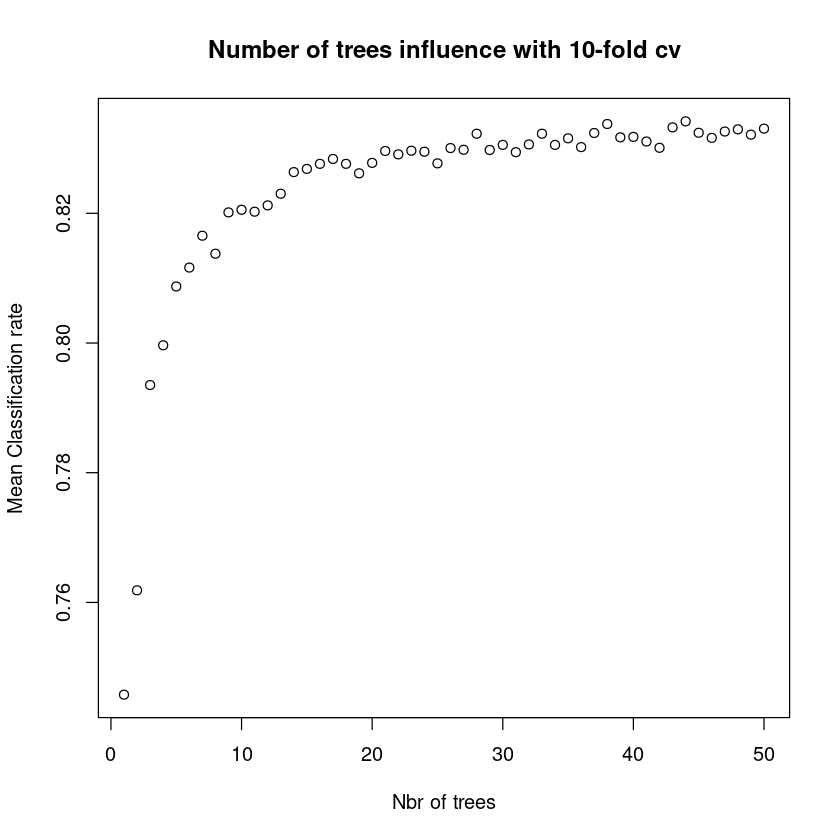

In [204]:
library("randomForest")

data_rf <- data.frame(training_sf, training_set_labels[2]) # H1N1

n_trees <- 50
k = 10

# 1. Shuffle the dataset randomly.
data_rf_idx <- sample(1:nrow(data_rf))

# 2. Split the dataset into k groups
max <- ceiling(nrow(data_rf)/k)
splits <- split(data_rf_idx , ceiling(seq_along(data_rf_idx)/max))

target_variable_rf <- ncol(data_rf)
mean_accuracy_vec <- array(0,n_trees)
accuracy_vec <- array(0,k)

for (i in 1:n_trees){ 
    for (j in 1:k){
        #3.1 Take the k-1 part of the dataset as a training data set
        train_data <- data_rf[-splits[[j]],]

        #3.2 Take the rest of the dataset as a hold out or test data set
        test_data <- data_rf[splits[[j]],]
        
        model <- randomForest(x=train_data[,-c(target_variable_rf)],
                              y=as.factor(train_data[,c(target_variable_rf)]),
                              xtest=test_data[,-c(target_variable_rf)],
                              ytest=as.factor(test_data[,c(target_variable_rf)]),
                              ntree=i)
        
        accuracy_vec[j] <- (model$test$confusion[1,1]+model$test$confusion[2,2])/sum(model$test$confusion)
    }
    mean_accuracy_vec[i] <- mean(accuracy_vec)
}
plot(mean_accuracy_vec ,main = "Number of trees influence with 10-fold cv",xlab = "Nbr of trees",ylab = "Mean Classification rate")

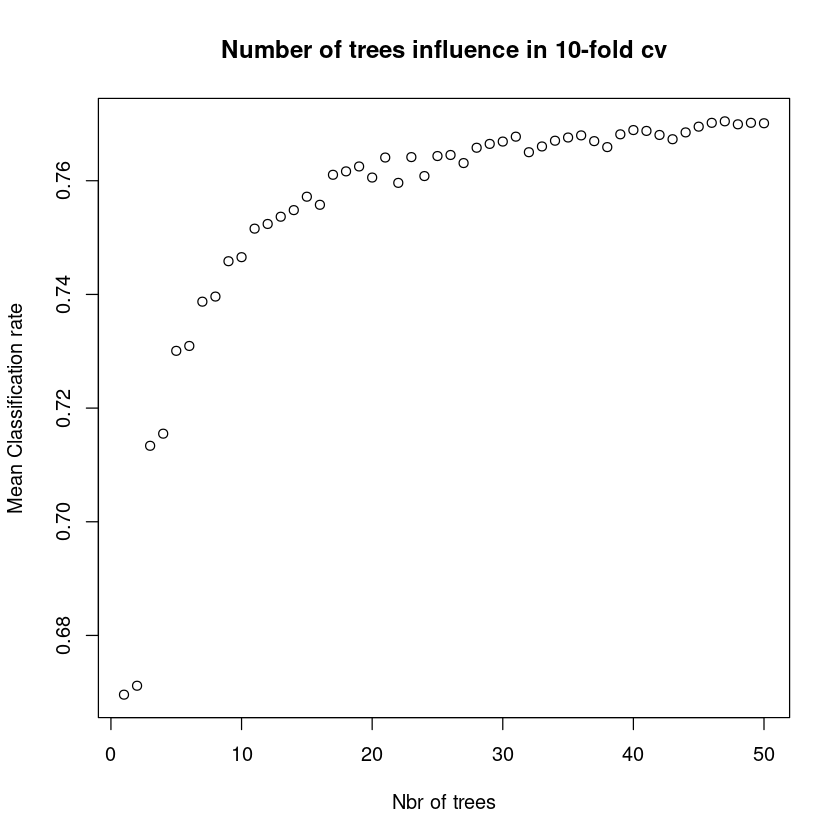

In [181]:
library("randomForest")

data_rf <- data.frame(training_sf, training_set_labels[3]) # seasonal

n_trees <- 50
k = 10

# 1. Shuffle the dataset randomly.
data_rf_idx <- sample(1:nrow(data_rf))

# 2. Split the dataset into k groups
max <- ceiling(nrow(data_rf)/k)
splits <- split(data_rf_idx , ceiling(seq_along(data_rf_idx)/max))

target_variable_rf <- ncol(data_rf)
mean_accuracy_vec <- array(0,n_trees)
accuracy_vec <- array(0,k)

for (i in 1:n_trees){
    for (j in 1:k){
        #3.1 Take the k-1 part of the dataset as a training data set
        train_data <- data_rf[-splits[[j]],]

        #3.2 Take the rest of the dataset as a hold out or test data set
        test_data <- data_rf[splits[[j]],]
        
        model <- randomForest(x=train_data[,-c(target_variable_rf)],
                              y=as.factor(train_data[,c(target_variable_rf)]),
                              xtest=test_data[,-c(target_variable_rf)],
                              ytest=as.factor(test_data[,c(target_variable_rf)]),
                              ntree=i)
        
        accuracy_vec[j] <- (model$test$confusion[1,1]+model$test$confusion[2,2])/sum(model$test$confusion)
    }
    mean_accuracy_vec[i] <- mean(accuracy_vec)
}
plot(mean_accuracy_vec ,main = "Number of trees influence in 10-fold cv",xlab = "Nbr of trees",ylab = "Mean Classification rate")

### Model Assessement
 
Unsurprisingly, the best results (with the lowest misclassification rate) for h1n1_vaccine and seasonal_vaccines were achieved with a large number of trees (44 trees and 47 trees respectively).
 
This is consistent with what was previously mentioned. In our random forest, we end up with trees trained on different sets of data (bagging) and therefore use different features (feature randomness) to make decisions. This creates an ensemble of uncorrelated trees that *buffer and protect each other* from their errors, resulting in an **increased accuracy**.
 
Now that the optimal number of trees has been determined, the model will be implemented using this optimal number of trees and a 50-50 training-testing set split.


In [27]:
library("randomForest")


submission <- data.frame(submission_format[1])
n_trees <- c(44,47)

for (i in 1:2) {
    data_rf <- data.frame(training_sf, training_set_labels[i+1]) 
    trees <- n_trees[i]


    data_rf_idx <- sample(1:nrow(data_rf))
    half_split <- floor(nrow(data_rf)/2)
    target_variable <- ncol(data_rf)

    train_data <- data_rf[data_rf_idx[1:half_split],]
    test_data <- data_rf[data_rf_idx[(half_split+1):nrow(data_rf)],]
        
    model <- randomForest(x=train_data[,-c(target_variable)],
                            y=train_data[,c(target_variable)],
                            xtest=test_data[,-c(target_variable)],
                            ytest=test_data[,c(target_variable)],
                            ntree=trees, 
                            keep.forest=TRUE)

    Y_pred <- predict(model,test_sf)
    Y_pred<-ifelse(Y_pred<=0,0.01,Y_pred)
    Y_pred<-ifelse(Y_pred>=1,0.99,Y_pred)
    submission <- data.frame(submission, Y_pred)
}

colnames(submission)[2:3] <- c(names(submission_format[2:3]))
write.csv(submission,"sample_data/random_forest_submission.csv", row.names = FALSE, quote=FALSE)

Warning message in randomForest.default(x = train_data[, -c(target_variable)], y = train_data[, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x = train_data[, -c(target_variable)], y = train_data[, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”


### Model Results

These predictions result in misclassification rates of 16.35% and 22.17% for H1N1 and Seasonal Flu Vaccine Predictions. (seen on graph)

## Model 3 <a class="anchor" id="Model_3_Neural_Network"></a>
 
For the third model, the model of choice was a **Neural Network**.
 
### Neural Network
 
A neural network is a network of interconnected processing elements, called neurons, that aims to understand the underlying relationships in datasets that can be used to make predictions (e.g. classify and estimate).
 
The concept is loosely modelled after central nervous systems of humans, particularly the brain. In such systems, processing units are interconnected and interact with each other in order to process information. The overall processing capacity depends on the strength of the connections between these neurons, which are dynamically modified over time in response to external stimuli the network is subject to. This is what allows it *to be intelligent* and learn from experience.
 
Neural networks are governed by their architecture, the configuration of all neurons and specification of involved input variables. Each neuron's activation function also plays a big role as it has a reverberating effect across the network. Finally, the learning rule defines how the network adjusts its neurons weights when confronted with new data, i.e. *how it learns*.
 
### Advantages
 
Given that each neuron is a processing unit in and of itself (with its own bias and weights), the compounding effect of all these neurons working in tandem results in a network whose **overall performance is improved** and can be compared to a an ensemble, due to the fact that it is indeed a *collection of miniature models*.
 
Additionally, the **versatility** of all these interconnected neurons and **ability to learn** by adjusting weights and biases by means of backpropagation allows neural networks to learn from data in a way other models simply cannot.
 
### Implementation
 
In order to determine the optimal parameters for the neural network, that is to say the number of hidden nodes as well as the decay value (used to prevent overfitting by regularisation, usualy the decay should be rather small (10⁻⁴), but with the testing the best result achieved was with bigger decays (0.4)), multiple neural networks with varying values for these parameters have been benchmarked and assessed with a 10-fold cross-validation process.
The initial weight of the neurons will be set to 0.02 $\approx$ 1/40 (40 being the number of features of our dataset).
abstol is a fit criterion, if the fit creterion falls below abstol, it indicates an essentially perfect fit.
MaxNWts is the maximum allowable number of weights, there are no limit by default, but if there are to many it will be time consuming, so we decided to set it at 10000.
The trace has been set to false so that it doesn't display all the optimisation the neural net goes through.
Skip = False will force the neurons to not skip the hidden layer and go directly to the output layer.
Finally the maximum number of iteration has been set to 3000 to let time to the neural net to find good solutions.


In [15]:
library(RSNNS)
library(nnet)

In [16]:
training_sf_nn <- data.frame(training_sf, training_set_labels[3])
head(training_sf_nn)

crossValidationInOutSample <- function(hidden_nodes=5,k=10,threshold=0.5, decays=0){
    target_variable <- ncol(training_sf_nn)
    accuracy_vec <- c()

    # 1. Shuffle the dataset randomly.
    training_idx <- sample(1:nrow(training_sf_nn))
    half_split <- floor(nrow(training_sf_nn)/2)

    # 2. Split the dataset into k groups
    max <- ceiling(nrow(training_sf_nn)/k)
    splits <- split(training_idx, ceiling(seq_along(training_idx)/max))

    # 3. For each unique group:
    for (i in 1:k){
        #3.1 Take the group as a hold out or training data set
        train_data <- training_sf_nn[-splits[[i]],]

        #3.2 Take the remaining groups as a test data set
        test_data <- training_sf_nn[splits[[i]],]
        print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

        #3.3 Fit a model on the training set and evaluate it on the test set
        model_single_out <- nnet(seasonal_vaccine ~ ., data=train_data,size=hidden_nodes, decay=decays, skip=FALSE, maxit=3000,rang=0.02,MaxNWts=10000,trace=FALSE, abstol=0.0001)
        Y_pred<-predict(model_single_out,test_data[,-target_variable])

        Y <- test_data[,target_variable]
        Y_hat <- ifelse(Y_pred > threshold,"1","0")
        confusion_matrix <- table(Y_hat,Y)

        #3.4 Retain the evaluation score and discard the model
        accuracy_vec[i] = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
        misclassification_rate = 1 - accuracy_vec[i]
        print(paste("[INFO] - Misclassification rate -",i,"fold:",misclassification_rate))
    }
    
    # 4.1 Summarize the skill of the model using the sample of model evaluation scores
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))

    # 4.2 Split training-test for in/out of sample predictions
    train_data <- training_sf_nn[training_idx[1:half_split],]
    test_data <- training_sf_nn[training_idx[(half_split+1):nrow(training_sf_nn)],]
    Y <- test_data[,target_variable]

    model_single_out <- nnet(seasonal_vaccine ~ ., data=train_data,size=hidden_nodes,decay=decays,trace=F,skip=FALSE,maxit=3000,rang=0.02,MaxNWts=10000,abstol=0.0001)
    model_single_out
    # 4.2 - In sample evaluation error computation
    Y_pred<-predict(model_single_out,train_data[,-target_variable])
    Y_hat_single_out_in_sample <- ifelse(Y_pred > threshold,"1","0")
    # 4.2 - Out of sample evaluation error computation
    Y_pred<-predict(model_single_out,test_data[,-target_variable])
    Y_hat_single_out_out_sample <- ifelse(Y_pred > threshold,"1","0")

    accuracy_in_sample <- computeResults(train_data[,target_variable],Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y,Y_hat_single_out_out_sample,"Out sample")
    return(list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample,cv=mean(accuracy_vec)))
}

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,⋯,Own,Rent,Employed,Not.in.Labor.Force,Unemployed,MSA..Principle.City,Non.MSA,household_adults,household_children,seasonal_vaccine
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.3333333,0.0,0,0,0,0,0,1,1,0,⋯,1,0,0,1,0,0,1,0.0000000,0,0
2,1.0000000,1.0,0,1,0,1,0,1,1,0,⋯,0,1,1,0,0,0,0,0.0000000,0,1
3,0.3333333,0.5,0,1,0,0,0,0,0,0,⋯,1,0,1,0,0,0,0,0.6666667,0,0
4,0.3333333,0.5,0,1,0,1,1,0,0,0,⋯,0,1,0,1,0,1,0,0.0000000,0,1
5,0.6666667,0.5,0,1,0,1,1,0,1,0,⋯,1,0,1,0,0,0,0,0.3333333,0,0
6,1.0000000,0.5,0,1,0,1,0,0,1,0,⋯,1,0,1,0,0,1,0,0.6666667,1,0


In [19]:
folds <- 10
hidden_nodes_vec <- c(2, 3, 4, 5)
decay_vec <- c(0.001, 0.01, 0.1, 0.2, 0.3, 0.4)
error_in_sample_vec <- numeric()
error_out_sample_vec <- numeric()
error_cv_vec <- numeric()

for(hidden_nodes in hidden_nodes_vec){
    for (decay in decay_vec){
        print(paste("[INFO] - TESTING HIDDEN NODE=",hidden_nodes))
        print(paste("[INFO] - TESTING DECAY=",decay))
        results <- crossValidationInOutSample(hidden_nodes=hidden_nodes,k=folds, decays=decay) #We change every time the number of hidden nodes.
        error_in_sample_vec <- c(error_in_sample_vec,results$in_sample)
        error_out_sample_vec <- c(error_out_sample_vec,results$out_sample)
        error_cv_vec <- c(error_cv_vec,results$cv)
    } 
}

[1] "[INFO] - TESTING HIDDEN NODE= 2"
[1] "[INFO] - TESTING DECAY= 0.001"
[1] "[INFO] - Training set size: 24036 - Testing set size 2671"
[1] "[INFO] - Misclassification rate - 1 fold: 0.242980157244478"
[1] "[INFO] - Training set size: 24036 - Testing set size 2671"
[1] "[INFO] - Misclassification rate - 2 fold: 0.219767877199551"
[1] "[INFO] - Training set size: 24036 - Testing set size 2671"
[1] "[INFO] - Misclassification rate - 3 fold: 0.223511793335829"
[1] "[INFO] - Training set size: 24036 - Testing set size 2671"
[1] "[INFO] - Misclassification rate - 4 fold: 0.216772744290528"
[1] "[INFO] - Training set size: 24036 - Testing set size 2671"
[1] "[INFO] - Misclassification rate - 5 fold: 0.210408086858854"
[1] "[INFO] - Training set size: 24036 - Testing set size 2671"
[1] "[INFO] - Misclassification rate - 6 fold: 0.221265443654062"
[1] "[INFO] - Training set size: 24036 - Testing set size 2671"
[1] "[INFO] - Misclassification rate - 7 fold: 0.217147135904156"
[1] "[INFO] - Tr

### Model Assessement
 
With regard to the neural network parameters, the best results (with the lowest misclassification rate) for both h1n1_vaccine and seasonal_vaccines were achieved with **5 hidden nodes** and a **decay value of 0.4**.

<img src="output.png"/>
 
Now that the optimal parameters have been determined, the model will be implemented using these optimal parameters.

In [20]:
submission <- data.frame(submission_format[1])

training_sf_nn <- data.frame(training_sf, training_set_labels[2])
target_variable <- ncol(training_sf_nn)

# 1. Shuffle the dataset randomly.
training_idx <- sample(1:nrow(training_sf_nn))

# 2. The train data is the whole data set.
train_data <- training_sf_nn[training_idx[1:nrow(training_sf_nn)],]

model<- nnet(h1n1_vaccine ~ ., data=train_data,size=5,decay=0.4,trace=F,skip=FALSE,maxit=3000,rang=0.02,MaxNWts=10000,abstol=0.0001)

Y_pred<-predict(model,test_sf)
Y_pred<-ifelse(Y_pred<=0,0.01,Y_pred)
Y_pred<-ifelse(Y_pred>=1,0.99,Y_pred)
submission <- data.frame(submission, Y_pred)    


training_sf_nn <- data.frame(training_sf, training_set_labels[3])
target_variable <- ncol(training_sf_nn)

# 1. Shuffle the dataset randomly.
training_idx <- sample(1:nrow(training_sf_nn))

# 2. The train data is the whole data set.
train_data <- training_sf_nn[training_idx[1:nrow(training_sf_nn)],]

model<- nnet(seasonal_vaccine ~ ., data=train_data,size=4,decay=0.4,trace=F,skip=FALSE,maxit=3000,rang=0.02,MaxNWts=10000,abstol=0.0001)

Y_pred<-predict(model,test_sf)
Y_pred<-ifelse(Y_pred<=0,0.01,Y_pred)
Y_pred<-ifelse(Y_pred>=1,0.99,Y_pred)
submission <- data.frame(submission, Y_pred)    

colnames(submission)[2:3] <- c(names(submission_format[2:3]))
write.csv(submission,"sample_data/neural_network_submission.csv", row.names = FALSE, quote=FALSE)


### Model Results

These predictions result in a misclassification rate of 16.23% for H1N1 Vaccine predictions and 22.09% for seasonal vaccine prediction.

# Alternative model <a class="anchor" id="alternative_model"></a>

## Deep Neural Network (Deep Learning)

Where a simple neural network would only have one hidden layer, a deep neural network's architecture feature multiple hidden layers. With this increased complexity, it is able to train on and predict more complex data. The word deep refers to the depth provided by the numerous hidden layers.
 
## Advantages

When compared to a simple neural network, it has an increased complexity which lets it process more complex data and generate more complex outputs. Some common prediction models whose performance cannot be mimicked by simple neural networks are recursive neural networks and convolutional neural networks.

While it takes more time to train a deep neural network, it nevertheless generally have a higher accuracy than simple neural networks, on top of having all of its advantages.
 
## Implementation
 
In order to determine the optimal parameters for the deep neural network, a similar procedure to that employed for the simple neural network has been used.
The first hidden layer of neurons has been chose to be 2/3 of the number of input features, this leads to a first hidden layer with 27 neurons. For the second hidden Layer we decided to divide the number of neurons of the first hidden layer by 2, this leads to 14 neurons.
There has also been added a drop out layer. Meaning that with a probabilty of 40% a features value will be droped from the first hidden layer, and with a probability of 20% they will be droped after the second hidden layer.
The activation of each hidden layer is different. In our testing, the ones leading to the best results were relu and softmax:
\begin{equation*}
RELU = max(0,x)
\end{equation*}
\begin{equation*}
softmax: \sigma(\bar{z}) = \frac{e^{z_i}}{\sum^{K}_{j=1}e^{z_j}}
\end{equation*}
where :
* $\bar{z}$ = input vector
* $e^{z_i}$ = standard exponential function for input vector
* $K$ = number of classes in the multi-class classifier
* $e^{z_j}$ = standard exponential function for output vector

Since our output value are binary, to compile our modele we used a loss that is binary crossentropy. And to do the backtracking on our neurons we use RMSProp which is a gradient descent backtracking methode.
The model has a 100 epoch to train and a batch size of 32. Finaly it has a validation split of 10%, meaning that it trains the data on 90% of the train data and validates with 10%.


In [ ]:
library(keras)
library(mlbench)
library(dplyr)
library(magrittr)
library(neuralnet)
library(nnet)
library(devtools)
library(RSNNS)
library(kernlab)
library(scales)
library(reshape)
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

In [25]:
data_dpnn <- data.frame(training_sf, training_set_labels[2])

# 0. converting the data from a dataframe into a simple matrix (required by keras)
data_dpnn <- as.matrix(data_dpnn)
dimnames(data_dpnn) <- NULL
target_variable <- ncol(data_dpnn)

k = 10 # folds

# 1. Shuffle the dataset randomly.
data_dpnn_idx <- sample(1:nrow(data_dpnn))

# 2. Split the dataset into k groups
max <- ceiling(nrow(data_dpnn)/k)
splits <- split(data_dpnn_idx , ceiling(seq_along(data_dpnn_idx)/max))

target_variable_rf <- ncol(data_dpnn)
accuracy_vec <- array(0,k)

# 3. for the k groups:
for (i in 1:k){
    #3.1 Take the k-1 part of the dataset as a training data set
    train_data <- data_dpnn[-splits[[i]],]

    #3.2 Take the rest of the dataset as a hold out or test data set
    test_data <- data_dpnn[splits[[i]],]

    model <- keras_model_sequential()
    model %>%  
        layer_dense(units=27, activation= 'relu', input_shape=c(ncol(data_dpnn)-1)) %>%
        layer_dropout(rate=0.4) %>%
        layer_dense(units=14, activation= 'softmax') %>%
        layer_dropout(rate=0.2) %>%
        layer_dense(units=1)

    model %>% compile(loss= 'binary_crossentropy', 
                        optimizer='rmsprop',
                        metrics=metric_binary_accuracy)

    mymodel <- model %>%
                fit(train_data[, -c(target_variable)], 
                    train_data[, target_variable],
                    epoch = 100, 
                    batch_size=32, 
                    validation_split=0.1)

    summary(model)
    
    model %>% evaluate(test_data[, -c(target_variable)], test_data[, target_variable])
    pred <- predict(model, test_data[, -c(target_variable)])
    threshold <- 0.5
    Y_hat <- ifelse(pred > threshold,"1","0")
    confusion_matrix <- table(Y_hat, test_data[, target_variable])
    accuracy_vec[i] <- (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
    print(paste("[INFO] model ", k , " fold with accuracy :", accuracy_vec[i]))
}

accuracy <- mean(accuracy_vec)
print(paste("[INFO] mean accuracy  :", accuracy))

Model: "sequential_10"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_32 (Dense)                   (None, 27)                      1053        
                                                                                
 dropout_21 (Dropout)               (None, 27)                      0           
                                                                                
 dense_31 (Dense)                   (None, 14)                      392         
                                                                                
 dropout_20 (Dropout)               (None, 14)                      0           
                                                                                
 dense_30 (Dense)                   (None, 1)                       15          
                                                                                
Total

In [26]:
model %>% evaluate(test_data[, -c(target_variable)], test_data[, target_variable])
pred <- predict(model, test_data[, -c(target_variable)])
threshold <- 0.5
Y_hat <- ifelse(pred > threshold,"1","0")
confusion_matrix <- table(Y_hat, test_data[, target_variable])
confusion_matrix
(confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)

loss binary_accuracy 
      0.4544281       0.8257121

     
Y_hat    0    1
    0 1955  320
    1  145  248

[1] 0.8257121

In [34]:
test <- test_sf
test <- as.matrix(test)
dimnames(test) <- NULL
submission <- data.frame(submission_format[1])

for (i in 1:2){
    data_dpln <- data.frame(training_sf, training_set_labels[i+1]) # for both target features
    data_dpln <- as.matrix(data_dpln)
    dimnames(data_dpln) <- NULL

    target_variable <- ncol(data_dpln)
    mix_idx <- sample(1:nrow(data_dpln))
    train_data <- data_dpln[mix_idx,]

    model <- keras_model_sequential()
    model %>%  
        layer_dense(units=27, activation= 'relu', input_shape=c(ncol(data_dpln)-1)) %>% # first hidden layer
        layer_dropout(rate=0.4) %>% # dropout layer 
        layer_dense(units=14, activation= 'softmax') %>% # second hidden layer
        layer_dropout(rate=0.2) %>% # dropout layer
        layer_dense(units=1) # output layer
    
    model %>% compile(loss= 'binary_crossentropy', # because binary output problem
                        optimizer='rmsprop',
                        metrics=metric_binary_accuracy)
    mymodel <- model %>%
                fit(train_data[, -c(target_variable)], 
                    train_data[, target_variable],
                    epoch = 100, # number of iteration for the training
                    batch_size=32, # to impose a fix batch of input to train the data
                    validation_split=0.1) # 10% of the train data reserved for validation

    summary(model)
    
    Y_pred <- predict(model, test)
    Y_pred<-ifelse(Y_pred<=0,0.01,Y_pred)
    Y_pred<-ifelse(Y_pred>=1,0.99,Y_pred)

    submission <- data.frame(submission, Y_pred)
}
colnames(submission)[2:3] <- c(names(submission_format[2:3]))

write.csv(submission, "sample_data/deep_neural_network_answers.csv", row.names = FALSE, quote=FALSE)


Model: "sequential_20"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_62 (Dense)                   (None, 27)                      1053        
                                                                                
 dropout_41 (Dropout)               (None, 27)                      0           
                                                                                
 dense_61 (Dense)                   (None, 14)                      392         
                                                                                
 dropout_40 (Dropout)               (None, 14)                      0           
                                                                                
 dense_60 (Dense)                   (None, 1)                       15          
                                                                                
Total

### Model Results

These predictions result in a misclassification rates of 16.31% for H1N1 Vaccine Predictions and 22.41% for Seasonal Prediction.

# Conclusion  <a class="anchor" id="Conclusion"></a>

After the exploration and implementation of different prediction models, the following observations have been made.

The linear regression model was a good **first model** to explore and implement. The biggest advantage is linearity: it makes the estimation procedure simple. In addition, the mathematics behind the model are easy to interpret. It has straightforward implementation (*plug-and-play*) and nevertheless provided decent results.

The random forest model required more implementation time but offered other advantages. It uses the notion of decision trees which, after a sequence of evaluations of different features, provides a classification/regression prediction. The value that the visualization/structure of a decision tree brings is also noteworthy as it is easy to identify **key features** (with regard to making predictions) because these features are evaluated at the top of the decision tree. Additionally, the model automatically includes relevant features and rejects less promising features. Moreover, overfitting can be mitigated by use of several *weaker* trees, a random forest.

The neural network model was another model with a *plug-and-play* nature. As soon as the hyperparameters have been set, the neural network can learn and adjust the neurons and connections accordingly. In addition, it is versatile as it can implement tasks that a linear program cannot and it has the ability to work with insufficient knowledge (NA values).

These observations could be extended to the deep neural network. It is a model using the same concept but with a larger number of hidden layers, hence with an increased complexity. The increased complexity generally offers better performance at the cost of an increased training time.

The table below summarizes the models' performances.

| Misclassification rate | Linear regression | Random forest | Neural network | Deep learning |
|------------------------|-------------------|---------------|----------------|---------------|
| H1N1                   | 16.82%            | 16.35%        | 16.23%         | 16.32%        |
| Seasonal               | 22.69%            | 22.17%        | 22.09%         | 22.41%        |
| average                | 19.76%            | 19.26%        | 19.16%         | 19.37%        |

Ranking :
1. Neural network
2. Random forest
3. Deep learning
4. Linear regression

With these performances in mind and although these misclassification rates are relatively similar, the best model to select is the Neural network. The projected *best* model, aka deep neural network, turned out to be only better than a linear regression model although being the most complexe and heavy to train. A good suprise was the linear regression model, as it was fast to implement and gave good results. As expected of random forest it performed decently well placing second in the ranking. 

### future improvement
The implementation of a better data preprocessing, especially for the categorical features, is somehting that could be a good lead to improve the current results. 
And again the exploration of other models/combination of model is also something to be further looked at.

### Results on the drivendata web site as of may 20 2022:

<img src="results.png"/>